In [1]:
import qiskit as q
from matplotlib import style
from qiskit import IBMQ
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_bloch_multivector, plot_histogram
style.use("dark_background")

In [2]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [3]:
provider = IBMQ.get_provider("ibm-q")

In [14]:
backend = provider.get_backend("ibmq_qasm_simulator")
sv_backend = q.Aer.get_backend("statevector_simulator")

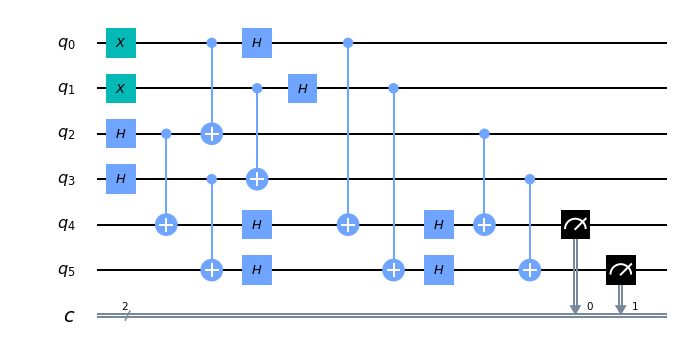

In [32]:
circuit = q.QuantumCircuit(6,2)
circuit.x(0)
circuit.x(1)
circuit.h(2)
circuit.h(3)
circuit.cx(2,4)
circuit.cx(0,2)
circuit.cx(3,5)
circuit.cx(1,3)
circuit.h(0)
circuit.h(1)
circuit.h(4)
circuit.cx(0,4)
circuit.h(4)
circuit.cx(2,4)
circuit.h(5)
circuit.cx(1,5)
circuit.h(5)
circuit.cx(3,5)
circuit.measure([4,5],[0,1])
circuit.draw(output="mpl")

In [21]:
job = q.execute(circuit, backend=backend, shots=1024)
job_monitor(job)
result = job.result()

Job Status: job has successfully run


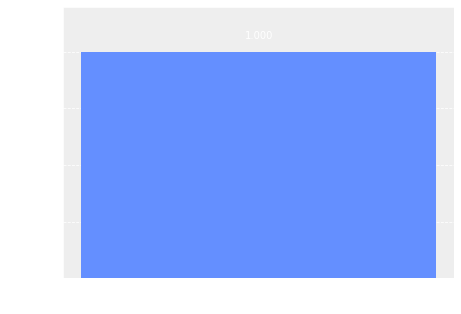

In [22]:
plot_histogram([result.get_counts(circuit)])

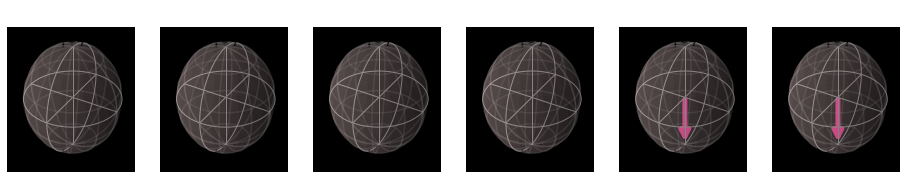

In [25]:
sv_job = q.execute(circuit, backend=sv_backend, shots=1024)
statevector = sv_job.result().get_statevector()
plot_bloch_multivector(statevector)